# Resume

Escrever o resumo aqui...

# Case Study

## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

## Load, Clean and Prepare Data

In [4]:
# Loading data
df = pd.read_csv('country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
 # Verify is have null data
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [39]:
# Calculate the fatality and recovery rate
df["Fatality Rate"] = df["Deaths"]/df["Confirmed"]*100
df["Recovery Rate"] = df["Recovered"]/df["Confirmed"]*100

df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Fatality Rate,Recovery Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,3.499435,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,2.950820,56.250000
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,4.157581,67.339935
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,5.733186,88.533627
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,4.315789,25.473684


## Data Analysis

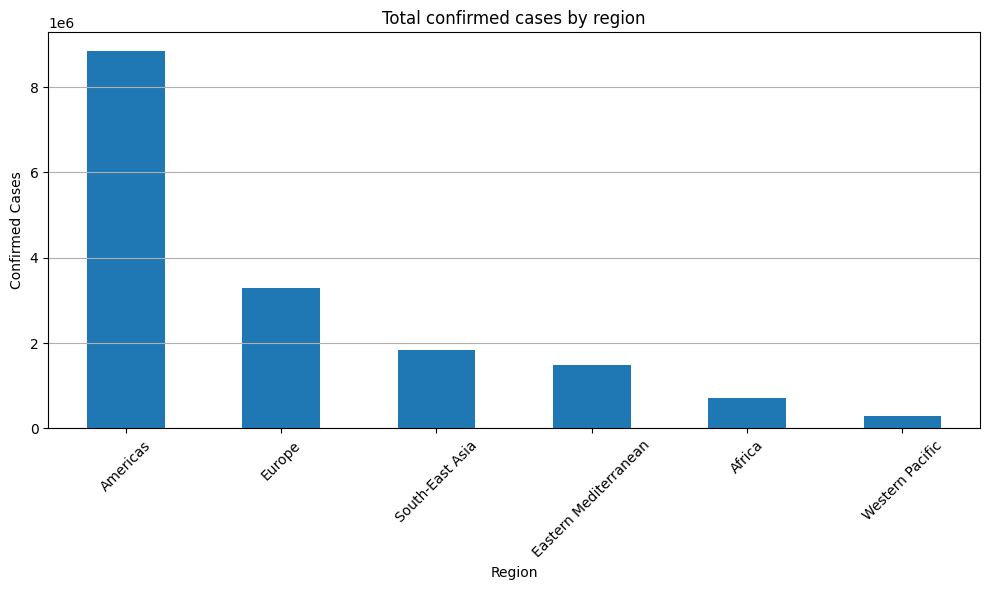

In [43]:
# Número de casos confirmados por WHO região
plt.figure(figsize=(10, 6))
df.groupby("WHO Region")["Confirmed"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Total confirmed cases by region")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.ylabel("Confirmed Cases")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

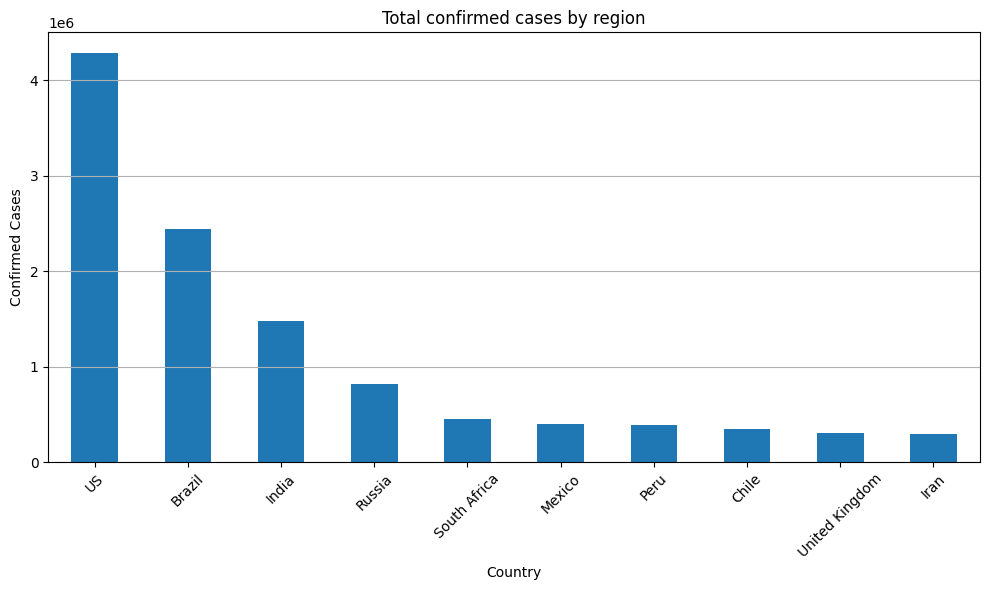

In [42]:
# Número de casos confirmados por região/país # top 10
plt.figure(figsize=(10, 6))
df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Total confirmed cases by region")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.ylabel("Confirmed Cases")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

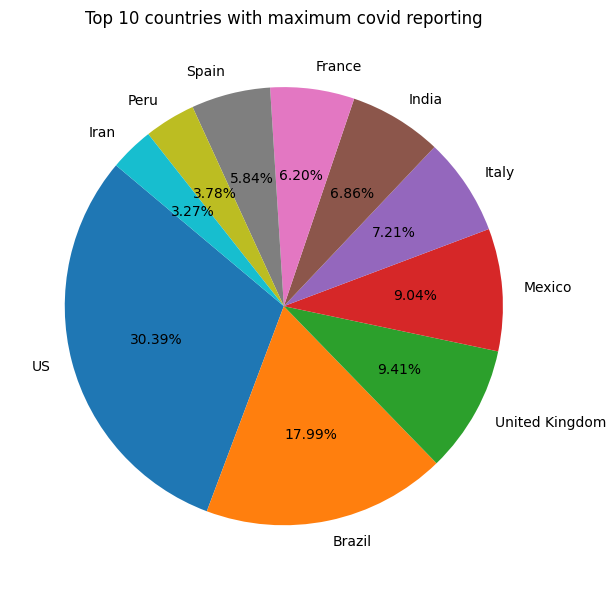

In [49]:
# Mortes região/país pie plot # top 10
plt.figure(figsize=(10, 6))
dfpie = df.groupby("Country/Region")["Deaths"].sum().sort_values(ascending=False).head(10)
pie_chart = plt.pie(dfpie, labels=dfpie.index, autopct="%0.2f%%", startangle= 140)
plt.title("Top 10 countries with maximum covid reporting")
plt.tight_layout()
plt.show()

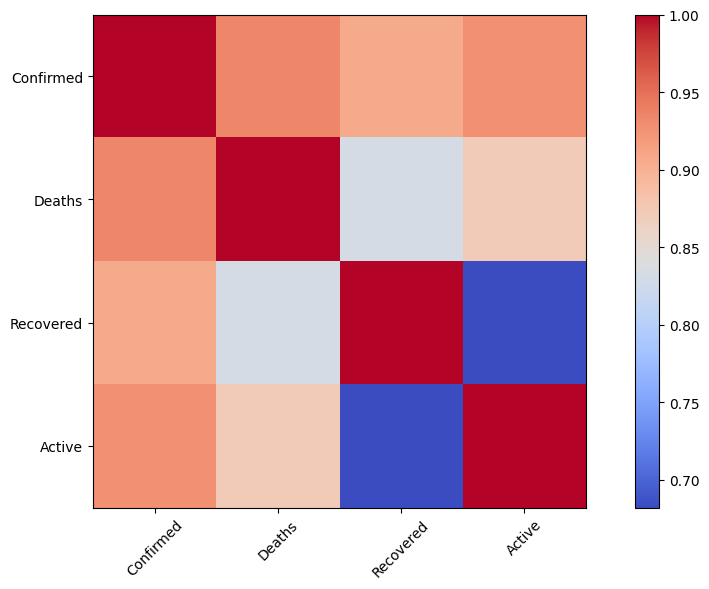

In [44]:
# Avalição das correlações
plt.figure(figsize=(10, 6))
correlation = df[["Confirmed", "Deaths", "Recovered", "Active"]].corr()
plt.imshow(correlation, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.tight_layout()
plt.show()

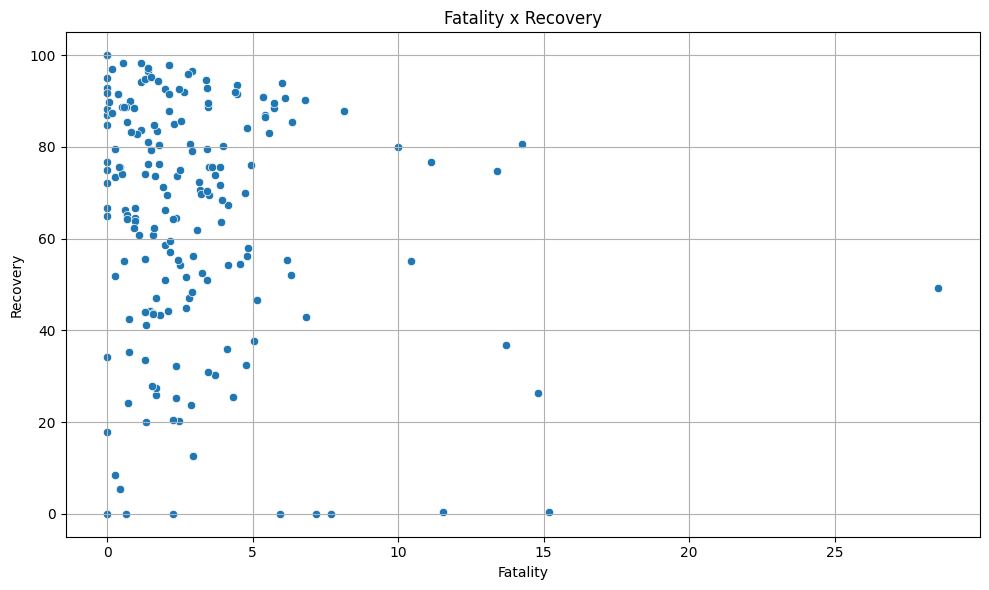

In [45]:
# Relation between fatality and recovery rate
plt.figure(figsize=(10, 6))
sn.scatterplot(x='Fatality Rate', y="Recovery Rate", data=df)
plt.title("Fatality x Recovery")
plt.xlabel("Fatality")
plt.ylabel("Recovery")
plt.grid(True)
plt.tight_layout()
plt.show()